# Introduction to plotting 

In [1]:
import b2plot
import matplotlib.pyplot as plt
%matplotlib inline

For optimal usage set `plt.style.use('belle2')`


In [2]:
plt.style.reload_library()

In [8]:
plt.style.use('belle2_serif')

In [2]:
%load_ext autoreload
%autoreload 2

### Creating some pseudo data

In [3]:
import pandas as pd
import numpy as np

ns =30000
nb =80000

df = {'mass': np.append(np.random.random_sample(nb)*7 - 3.5, np.random.normal(0, 0.5, ns))}
df['sig'] = np.append(np.zeros(nb),np.ones(ns), )
df['exp'] = np.random.randint(0,8, ns+nb)
df['gauss'] = np.append(np.random.normal(-1, 0.5, ns),np.random.random_sample(nb)*7 - 3.5)

df = pd.DataFrame(df)

df1 = {'mass': np.append(np.random.random_sample(nb)*7 - 3.5, np.random.random_sample(ns)*7 - 3.5 )}
df1['sig'] = np.append(np.zeros(nb),np.ones(ns), )
df1 = pd.DataFrame(df1)

In [5]:
from sklearn.datasets import make_classification
X,y = make_classification(10000,5)
df2 = pd.DataFrame(X, columns=['col%d'%d for d in range(5)])
df2['sig'] = y

In [7]:
from b2plot.analysis import data_mc_ratio, plot_flatness, purity_hist, purity_flatness_proba
from b2plot.functions import profile

In [37]:
X.shape

(10000, 6)

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(X,y)
df2['prob'] = clf.predict_proba(X)[:,1]

col0
col1
col2
col3
col4


/afs/desy.de/user/s/swehle/Tools/b2plot/src/b2plot/analysis.py:164: RuntimeWarning: divide by zero encountered in true_divide
  chi2 = ((cl - cs) ** 2) / pe ** 2
/afs/desy.de/user/s/swehle/Tools/b2plot/src/b2plot/analysis.py:111: RuntimeWarning: invalid value encountered in true_divide
  pur = y_1 / (y_1 + y_0)


col5
sig
prob


/afs/desy.de/user/s/swehle/Tools/b2plot/src/b2plot/analysis.py:164: RuntimeWarning: invalid value encountered in true_divide
  chi2 = ((cl - cs) ** 2) / pe ** 2


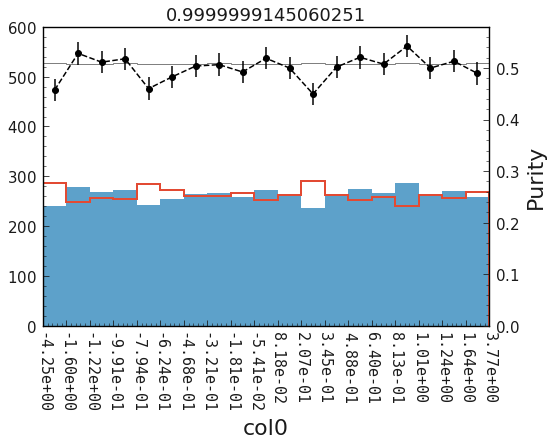

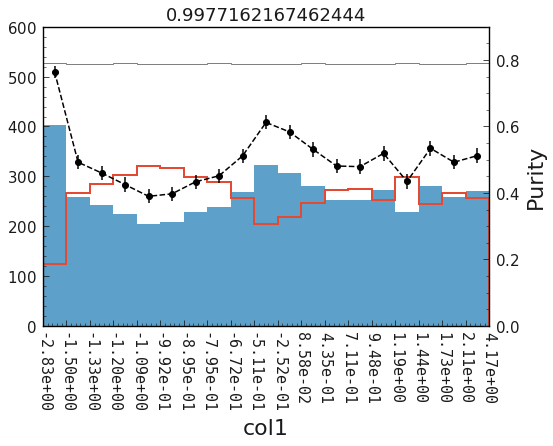

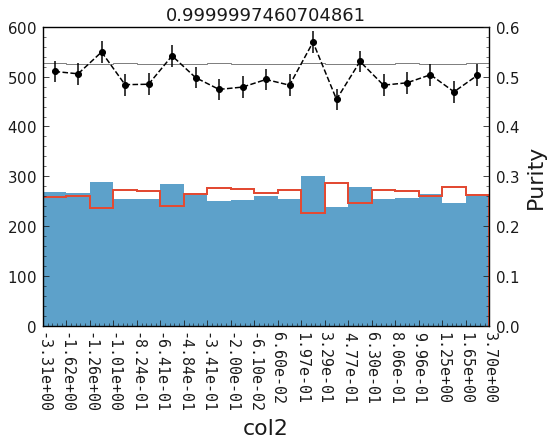

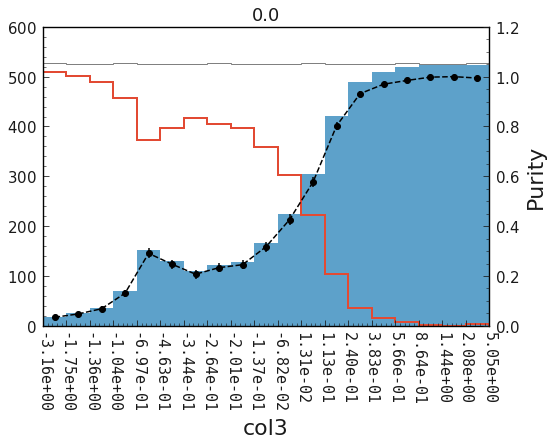

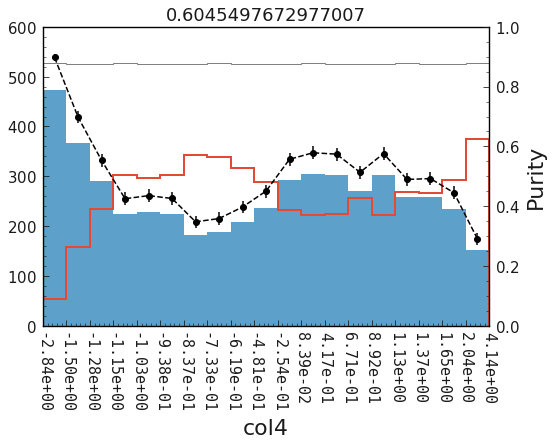

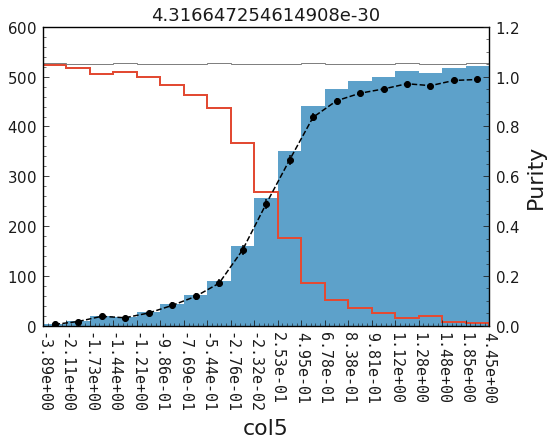

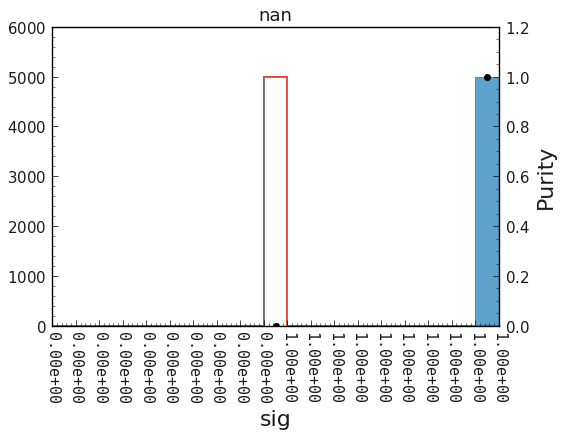

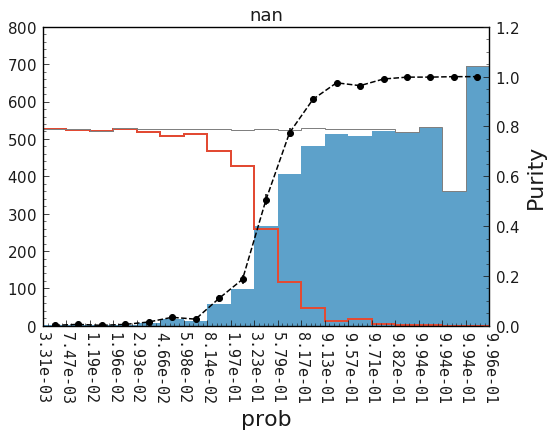

In [10]:
for  c in df2.columns:
    print(c, )
    prob = purity_flatness_proba(df2[c], df2.sig==1, nbins=20, do_plot=True)
    plt.xlabel(c)
    plt.title(prob)

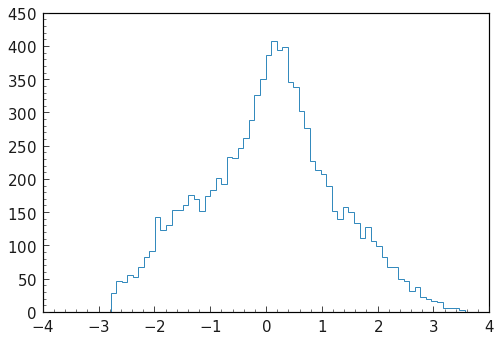

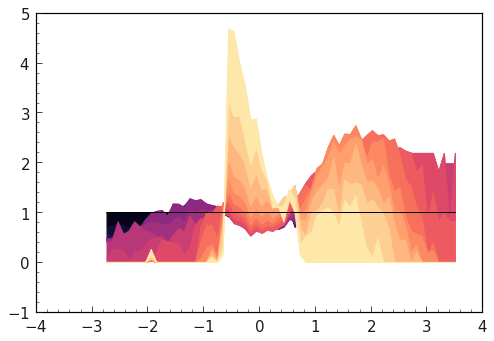

In [50]:
b2plot.hist(df2.col1)
plot_flatness(df2.col1, df2.prob)

In [11]:
import protools

ModuleNotFoundError: No module named 'protools'

In [88]:
def draw_correlation_matrix(df, labels=None, size=8, fontsize=8, pdf=None):

    assert isinstance(df, pd.DataFrame), 'Argument of wrong type!'

    if labels is None:
        labels = df.columns

#     Style().create_figure(width=size)
    fig, ax = plt.subplots(figsize=[size,size])
    m = df.corr().values
    plt.imshow(m, clim=(-1, 1),  interpolation = 'nearest', cmap='PiYG')
#     plt.colorbar()

    nvars = len(df.columns)

    for i in range(nvars):
        for j in range(nvars):
            plt.text(i, j, "%.3f" % m[i][j], fontsize=fontsize, va='center', ha='center',)

    ax.set_yticklabels([None]+list(labels))
    plt.xticks(range(nvars), labels, rotation=90)#,fontsize=fontsize)
#     plt.yticks(range(nvars), labels,)#  fontsize=fontsize)

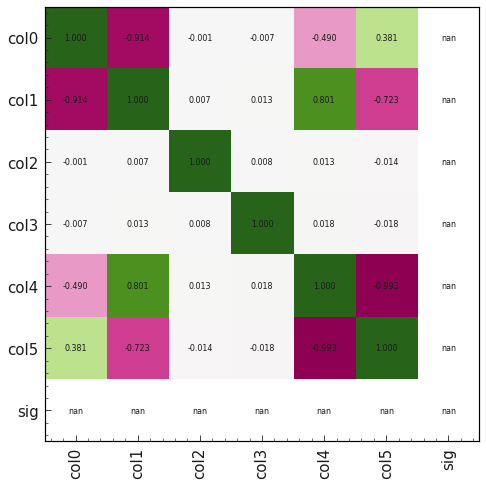

In [89]:
draw_correlation_matrix(df2[df2.sig==1])

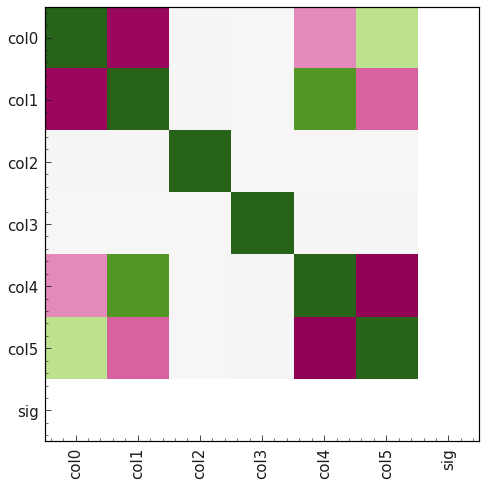

In [83]:
draw_correlation_matrix(df2[df2.sig==0])

In [1]:
import protools

misc               	 INFO     Moin this is Logging


ImportError: cannot import name 'get_optimal_bin_size'

In [6]:
from protools.drawtools import draw_corr_page, draw_fancy_correlation_matrix

misc               	 INFO     Moin this is Logging


Welcome to JupyROOT 6.18/00


Styler             	 INFO     Setting plot style
Styler             	 INFO     Setting plot style
Styler             	 INFO     Setting plot style
Styler             	 INFO     Setting plot style
Styler             	 INFO     Setting plot style
Styler             	 INFO     Setting plot style
Styler             	 INFO     Setting plot style
Styler             	 INFO     Setting plot style
Styler             	 INFO     Setting plot style
Styler             	 INFO     Setting plot style
Styler             	 INFO     Setting plot style
Styler             	 INFO     Setting plot style
Styler             	 INFO     Setting plot style
Styler             	 INFO     Setting plot style
Styler             	 INFO     Setting plot style
Styler             	 INFO     Setting plot style


3 0 col0 goin in
3 1 col1 goin in
3 2 col2 goin in
3 3 col3 goin in


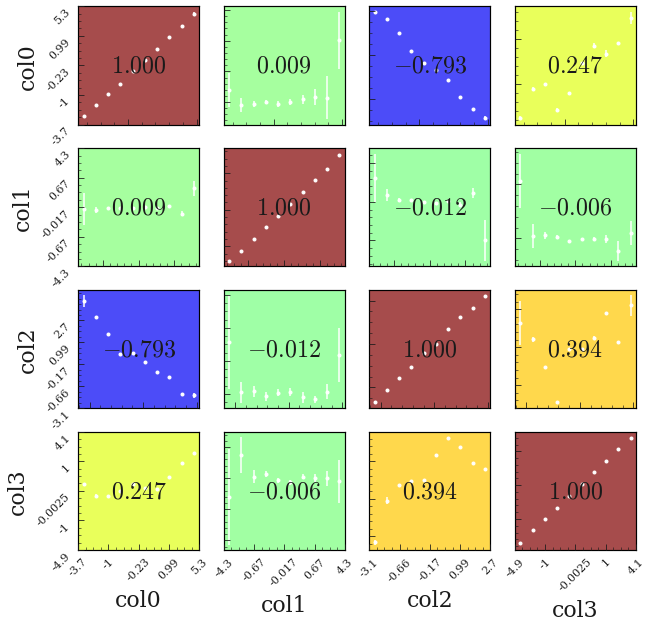

In [12]:
draw_fancy_correlation_matrix(df2[df2.columns[0:4]], size=10)

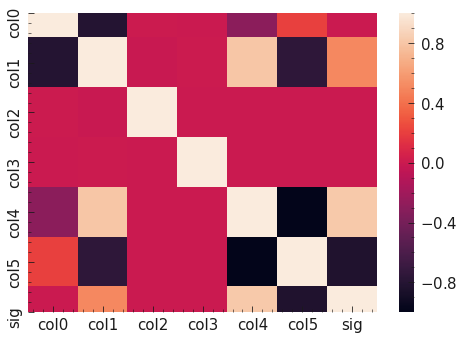

In [79]:
import seaborn as sns
sns.heatmap(df2.corr(), square=True)

<ErrorbarContainer object of 3 artists>

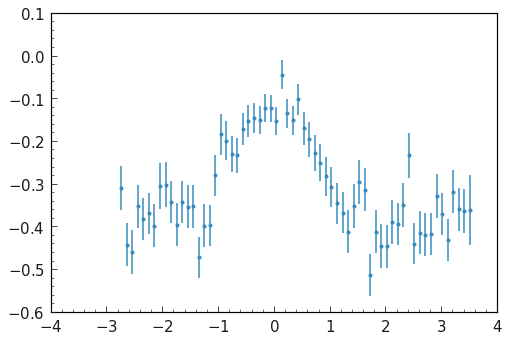

In [51]:
profile(df.mass, df.gauss)

In [62]:
purity_flatness_proba(df.mass, df.sig==1,nbins=20)

1.879407461118842e-67

(array([0.00000000e+00, 0.00000000e+00, 1.72711572e-04, 1.03644844e-02,
        9.46459413e-02, 3.33218172e-01, 5.26343064e-01, 6.17443869e-01,
        6.58317499e-01, 6.78583765e-01, 6.65227155e-01, 6.20725389e-01,
        5.32561755e-01, 3.39782346e-01, 9.68911917e-02, 7.08239765e-03,
        5.18134715e-04, 0.00000000e+00, 0.00000000e+00]),
 array([0.        , 0.        , 0.0001727 , 0.0013311 , 0.00384699,
        0.00619519, 0.00656243, 0.00638715, 0.00623343, 0.00613757,
        0.00620238, 0.00637657, 0.00655761, 0.00622504, 0.00388752,
        0.00110216, 0.00029907, 0.        , 0.        ]),
 array([-3.49998456, -2.99621106, -2.48412663, -1.98657131, -1.49138147,
        -1.03294759, -0.69066431, -0.44952169, -0.25642969, -0.08658353,
         0.0751419 ,  0.25015041,  0.44413175,  0.68391939,  1.02768552,
         1.49057845,  1.9924017 ,  2.50093096,  3.00487695,  3.49996936]))

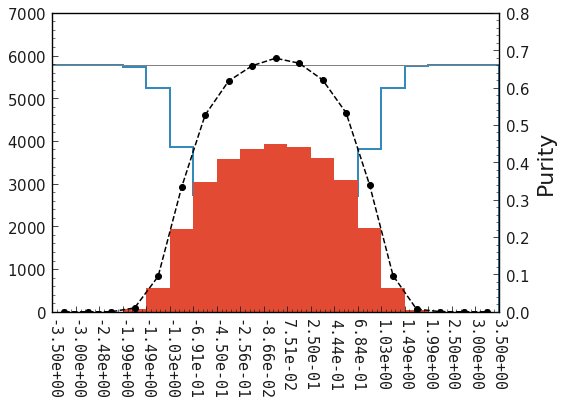

In [20]:
purity_hist(df.mass, df.sig==1,nbins=20)

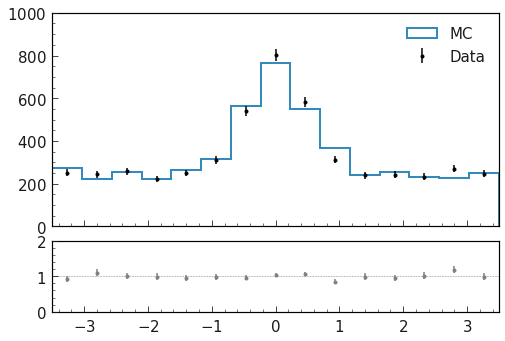

In [71]:
data_mc_ratio(df.mass.sample(5000), df.mass.sample(5000), bins=15)

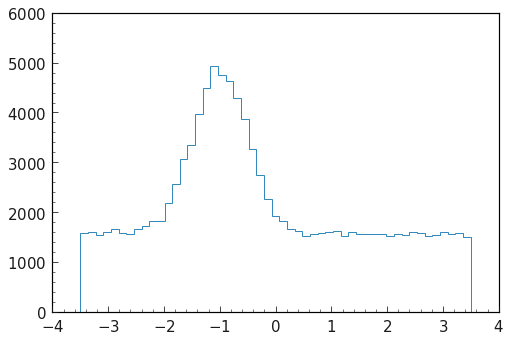

In [19]:
h = b2plot.hist(df.gauss)

In [22]:
import seaborn as sns

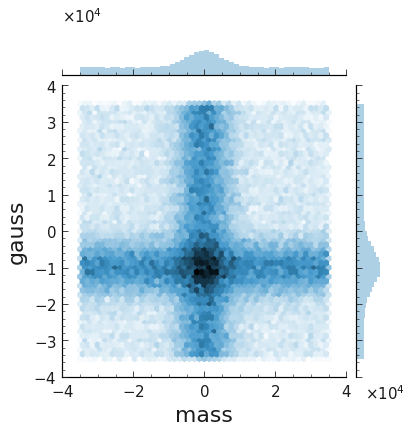

In [28]:
sns.jointplot(df.mass, df.gauss, kind='hex')

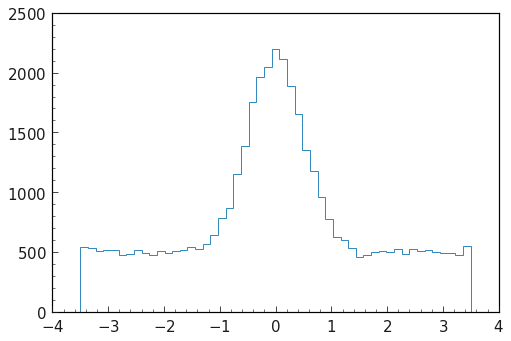

In [29]:
h = b2plot.hist(df.query('gauss>0').mass)

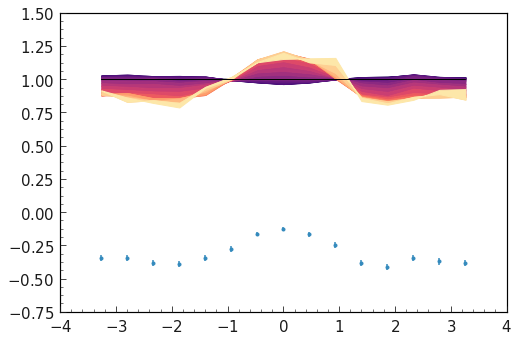

In [72]:
plot_flatness(df.mass, df.gauss)
profile(df.mass, df.gauss)

# Simple Plot

[]

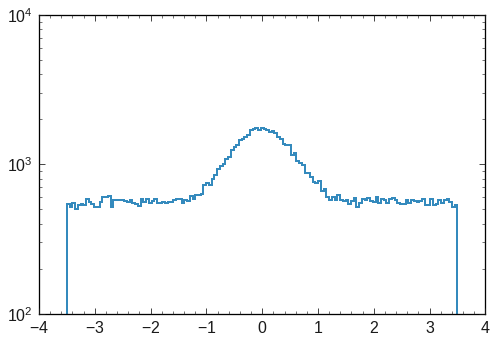

In [10]:
_ = b2plot.hist(df.mass, lw=2)
plt.semilogy()

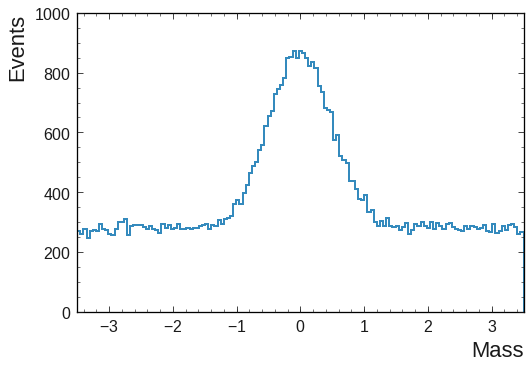

In [5]:
b2plot.hist(df.mass, lw=2, scale=0.5, weights=np.random.normal(1,0.1,len(df)))
b2plot.xlim()
b2plot.labels("Mass", "Events", root_style=1)

In [37]:
isinstance(1, bool)

[autoreload of b2plot.functions failed: Traceback (most recent call last):
  File "/home/share/basf2/externals/v01-05-02/Linux_x86_64/common/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
  File "/afs/desy.de/user/s/swehle/Tools/b2plot/src/b2plot/functions.py", line 92
    if isinstance(scale, )
                         ^
SyntaxError: invalid syntax
]


False

In [ ]:
b2plot.figure()
b2plot.hist(df.mass, color=1, style=0)
b2plot.xlim()
b2plot.labels("Mass", "Events", root_style=1)

In [ ]:
xx = df.sample(50).mass
# b2plot.figure()
b2plot.errorbar(xx, color='black')
b2plot.xlim()
plt.ylim(0)
b2plot.labels("Mass", "Events", 'GeV', root_style=1)

In [ ]:
b2plot.errorbar(xx, box=True)
b2plot.xlim()
plt.ylim(0)
b2plot.labels("Mass", "Events", 'GeV',root_style=1)

# Several Distrtibutions

In [ ]:
b2plot.hist(df.mass,  style=0,)

b2plot.hist(df1.mass,  lw=2)

b2plot.xlim()
b2plot.labels("Mass", "Events",'' )

In [ ]:
b2plot.sig_bkg_plot(df, "mass", 'sig')

In [ ]:
b2plot.figure()
b2plot.hist(df[df.sig==1].mass,  style=0, color=0, range=(-3,3), label='Signal')
b2plot.hist(df1.mass,  style=1, color=1, label='MC1')
b2plot.hist(np.random.normal(-3,1, 10000), style=2, color=3, label='NP')
b2plot.xlim()
plt.legend()
b2plot.labels("Mass", "Events",'GeV' ,1)

In [ ]:
b2plot.stacked(df, "mass", 'exp', bins=50, lw=.25)
# b2plot.errorbar(df1.mass, color='black')
b2plot.xlim()

In [ ]:
b2plot.stacked([df[df.exp==2].mass, 
                df[df.exp==3].mass], 
               bins=50, lw=.25)
# b2plot.errorbar(df1.mass, color='black')
b2plot.xlim()

In [ ]:
b2plot.stacked(df, "mass", 'exp', bins=50, color=b2plot.b2helix(8), label=range(8))
b2plot.errorbar(df.mass.values, color='black', weights=np.random.normal(1.01,0.9, len(df)), label="Data")
b2plot.xlim()
plt.legend()
b2plot.labels("$M$", "Events", 'GeV', 1)

In [ ]:
from b2plot.analysis import plot_flatness


In [ ]:
with plt.style.context(('belle2_modern')):
    b2plot.figure()
    plot_flatness(df.mass, df.gauss, xrange= (-4,3))
    b2plot.xlim()

/cvmfs/belle.cern.ch/sl6/externals/v01-06-01/Linux_x86_64/common/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


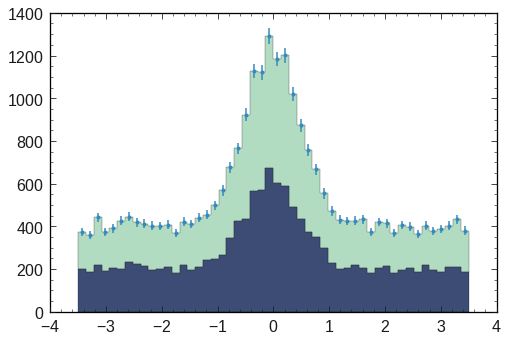

In [27]:
y,x,h = b2plot.stacked([df[df.exp==2].mass, 
                df[df.exp==3].mass], 
               bins=50, lw=.25)
b2plot.errorbar((x[:-1]+ x[1:])/2, y, np.sqrt(y) )

In [21]:
len(np.sqrt(y))

50

In [18]:
len(y)

50

In [26]:
(x[:-1]+ x[1:])/2

array([-3.42914666, -3.28921358, -3.1492805 , -3.00934742, -2.86941434,
       -2.72948126, -2.58954818, -2.4496151 , -2.30968203, -2.16974895,
       -2.02981587, -1.88988279, -1.74994971, -1.61001663, -1.47008355,
       -1.33015047, -1.19021739, -1.05028432, -0.91035124, -0.77041816,
       -0.63048508, -0.490552  , -0.35061892, -0.21068584, -0.07075276,
        0.06918032,  0.20911339,  0.34904647,  0.48897955,  0.62891263,
        0.76884571,  0.90877879,  1.04871187,  1.18864495,  1.32857803,
        1.4685111 ,  1.60844418,  1.74837726,  1.88831034,  2.02824342,
        2.1681765 ,  2.30810958,  2.44804266,  2.58797573,  2.72790881,
        2.86784189,  3.00777497,  3.14770805,  3.28764113,  3.42757421])

In [ ]:
x[:]

In [1]:
#@title Examples

text = 'value' #@param 
date_input = '2018-03-22' #@param {type:"date"}
number_slider = -0.4 #@param {type:"slider", min:-1, max:1, step:0.1}
dropdown = '1st option' #@param ["1st option", "2nd option", "3rd option"]